In [3]:
import pandas as pd

df = pd.read_excel('D:/computational neuroscince/NeuroAI/project/data/pnas.1507110112.sd01.xls')

print(df.head())  # Display the first few rows of the dataframe


   Time(s)   x(mm)   y(mm)  behavior  Neuron 1  Neuron 2  Neuron 3  Neuron 4  \
0    0.000 -5.4791  1.5114        -1   0.86033       NaN -0.029284 -0.004776   
1    0.165 -5.4771  1.5151        -1   0.89816       NaN -0.041195  0.027495   
2    0.330 -5.4725  1.5167        -1   0.83825   0.31196 -0.052978  0.066828   
3    0.500 -5.4755  1.5171        -1   0.83344   0.35775 -0.072999  0.123440   
4    0.666 -5.4709  1.5192         2   0.89089   0.57661 -0.079192  0.169710   

   Neuron 5  Neuron 6  ...  Neuron 47  Neuron 48  Neuron 49  Neuron 50  \
0       NaN  -0.21625  ...    0.25548        NaN   0.082754   0.026320   
1       NaN  -0.22054  ...    0.25251        NaN   0.117410   0.037162   
2   0.29264  -0.22495  ...    0.22088   0.110040   0.138200   0.032764   
3   0.28903  -0.23708  ...    0.17289   0.077975   0.134000   0.020725   
4   0.30200  -0.24922  ...    0.12489   0.058238   0.133590   0.006832   

   Neuron 51  Neuron 52  Neuron 53  Neuron 54  Neuron 55  Neuron 56  
0   

In [4]:

import pandas as pd

data = 'D:/computational neuroscince/NeuroAI/project/data/pnas.1507110112.sd01.xls'

sheets = pd.read_excel(data, sheet_name=None)

In [5]:
neuron_data = {}
behavior_labels = {}

for sheet_name, df in sheets.items():
    # Extract neuron data from columns E to BT
    neuron_data[sheet_name] = df.iloc[:, 4:73]  # Adjust columns if necessary
    
    # Extract behavior labels from column D
    behavior_labels[sheet_name] = df.iloc[:, 3]  # Adjust column if necessary


In [13]:
import numpy as np

def compute_rsa(neuron_data, behavior_labels):
    unique_behaviors = behavior_labels.unique()
    rsa_results = {}

    for behavior in unique_behaviors:
        # Select data for the current behavior
        behavior_data = neuron_data[behavior_labels == behavior]
        
        # Compute the similarity matrix (e.g., using correlation)
        similarity_matrix = behavior_data.corr(method='pearson').values
        
        rsa_results[behavior] = similarity_matrix
    
    return rsa_results

rsa_results = {}

for sheet_name in neuron_data.keys():
    rsa_results[sheet_name] = compute_rsa(neuron_data[sheet_name], behavior_labels[sheet_name])


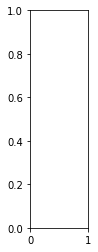

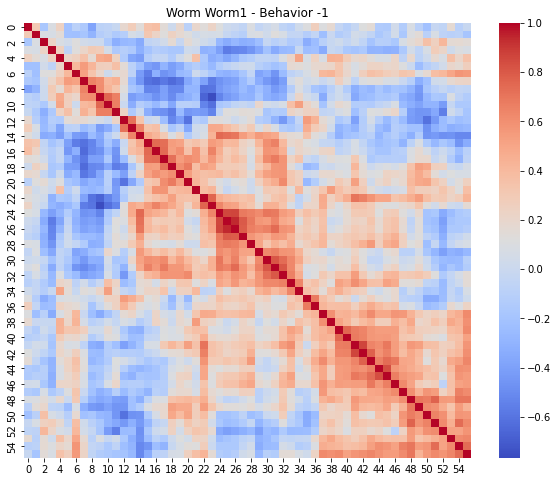

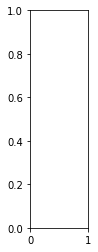

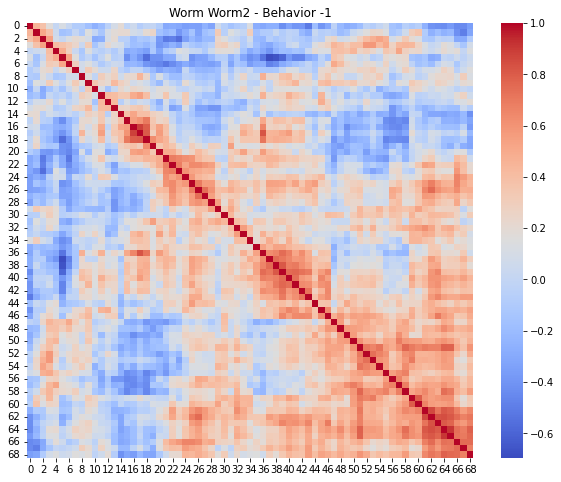

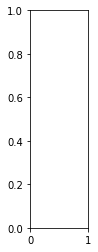

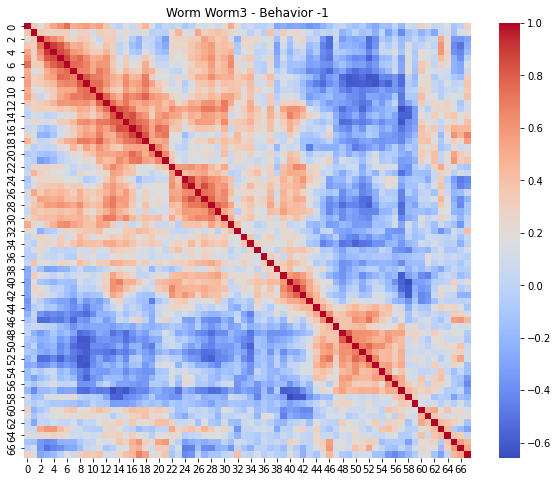

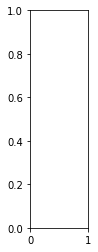

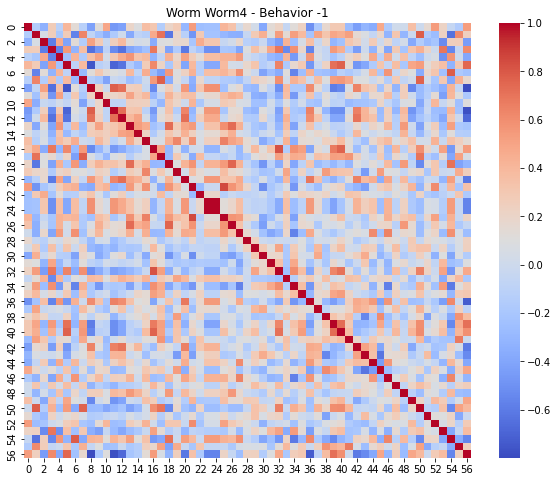

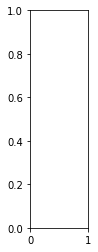

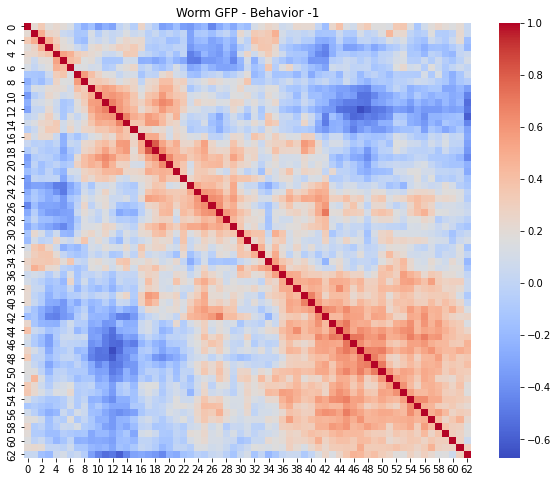

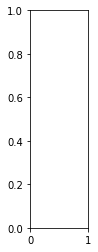

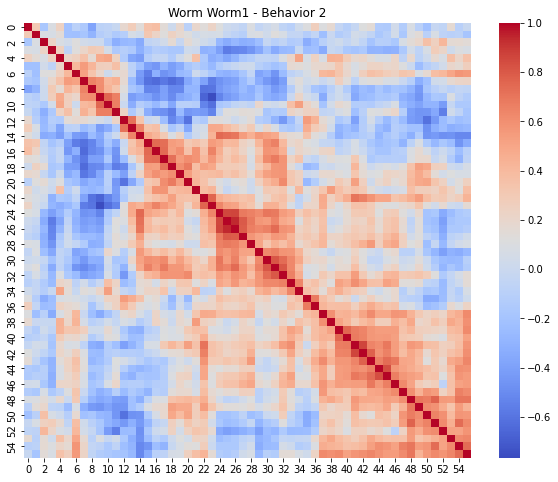

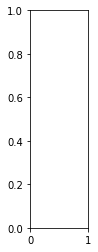

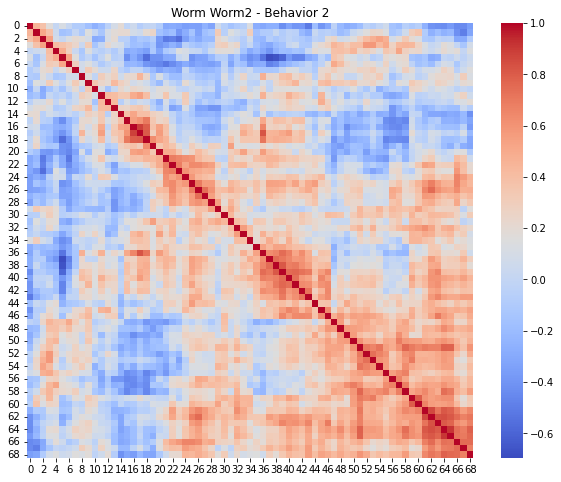

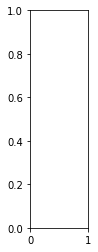

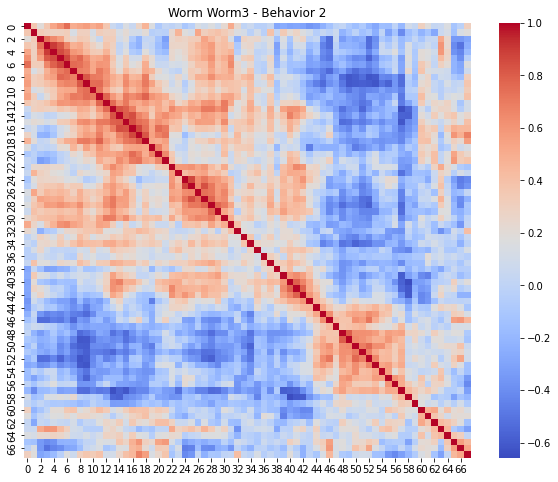

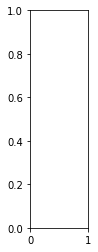

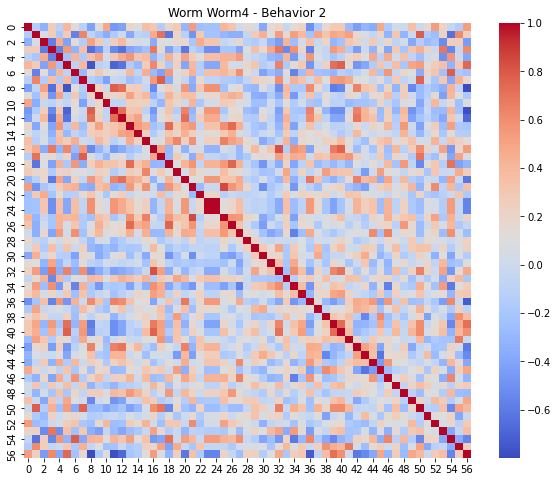

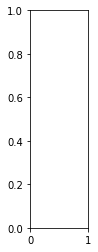

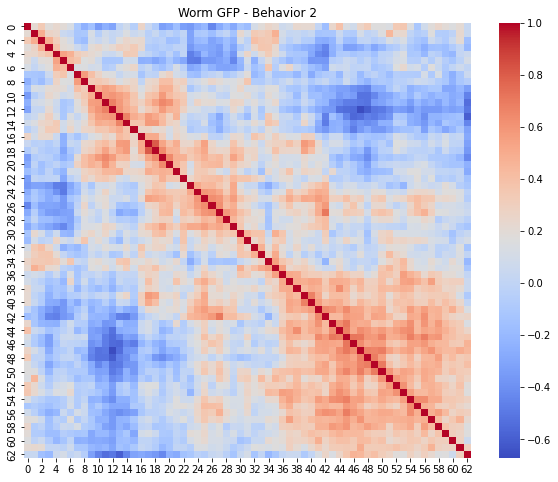

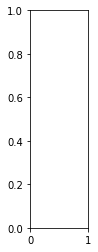

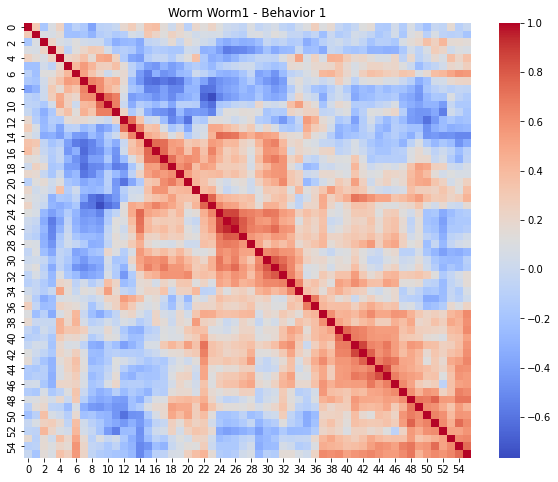

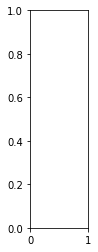

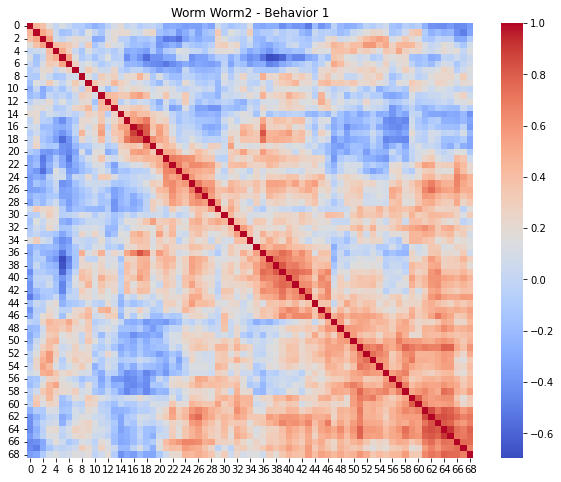

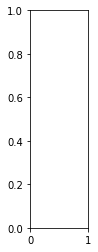

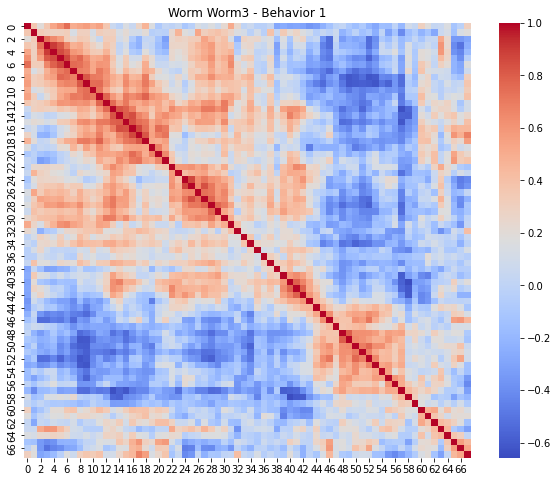

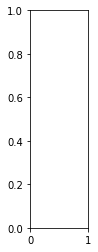

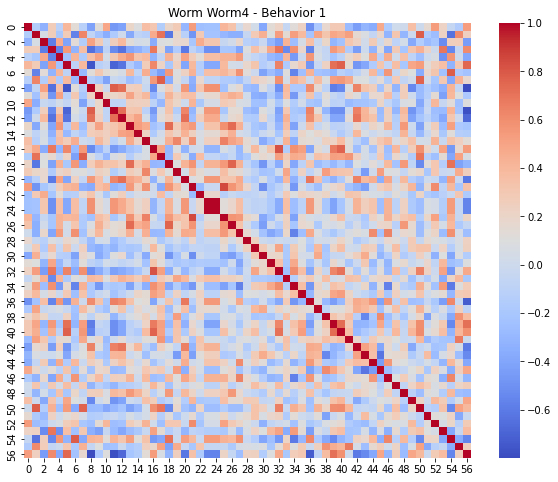

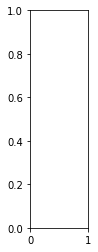

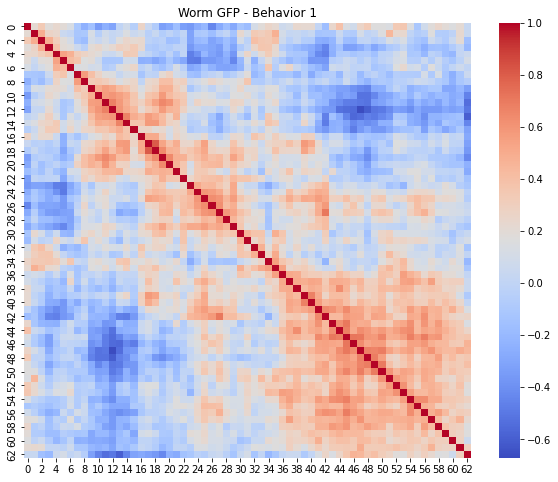

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_similarity_matrix(matrix, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=False, cmap='coolwarm')
    plt.title(title)
    plt.show()

for behavior in rsa_results[list(rsa_results.keys())[0]].keys():
    # plt.figure(figsize=(20, 5))
    
    for i, worm in enumerate(rsa_results.keys()):
        plt.subplot(1, len(rsa_results), i + 1)
        plot_similarity_matrix(rsa_results[worm][behavior], f'Worm {worm} - Behavior {behavior}')
    
    plt.show()
